# Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import Dataset

In [2]:
dataset = pd.read_csv("ev_market_india.csv")
x = dataset.iloc[ : , : -1].values
y = dataset.iloc[ : , -1].values


Print the Features of matrix

In [3]:
print(x)

[['Tesla ' 'Model 3 Long Range Dual Motor' 4.6 ... 'Sedan' 'D' 5]
 ['Volkswagen ' 'ID.3 Pure' 10.0 ... 'Hatchback' 'C' 5]
 ['Polestar ' '2' 4.7 ... 'Liftback' 'D' 5]
 ...
 ['Nissan ' 'Ariya e-4ORCE 63kWh' 5.9 ... 'Hatchback' 'C' 5]
 ['Nissan ' 'Ariya e-4ORCE 87kWh Performance' 5.1 ... 'Hatchback' 'C' 5]
 ['Byton ' 'M-Byte 95 kWh 2WD' 7.5 ... 'SUV' 'E' 5]]


Print the Target Variable

In [4]:
print(y)

[ 55480  30000  56440  68040  32997 105000  31900  29682  46380  55000
  69484  29234  40795  65000  34459  40936 180781  21421  30000  31681
  29146  58620  35000 125000  61480  45000  33000  60437  38017  34361
  67358  38105  31184  75000  32646  37237  50000  45000  33133  45000
  79990  33971  81639  24534  20129  36837  41906 102945 149000  36057
  79445 215000  35000  40000  85990  35921  37422  24790  40000  96990
  29234  65620  50000  75351  54475 109302  33246  55000  38000  62900
  41526  45000 150000  64000  25500  34400  57500  22030  54000 148301
  38987 102990  21387  46900  70631  34900  45000  69551  47500  37500
  93800  24565  36837  57500  37900  35575  33133  53500  45000  96050
  50000  65000  62000]


Print the First 5 Values of Dataset

In [5]:
print(dataset.head(5))

         Brand                          Model  AccelSec  TopSpeed_KmH  \
0       Tesla   Model 3 Long Range Dual Motor       4.6           233   
1  Volkswagen                       ID.3 Pure      10.0           160   
2    Polestar                               2       4.7           210   
3         BMW                            iX3        6.8           180   
4       Honda                              e        9.5           145   

   Range_Km  Efficiency_WhKm  FastCharge_KmH RapidCharge PowerTrain  \
0       450              161             940         Yes        AWD   
1       270              167             250          No        RWD   
2       400              181             620         Yes        AWD   
3       360              206             560         Yes        RWD   
4       170              168             190         Yes        RWD   

     PlugType  BodyStyle Segment  Seats  PriceEuro  
0  Type 2 CCS      Sedan       D      5      55480  
1  Type 2 CCS  Hatchback    

Print the Last 5 Values of Dataset

In [6]:
print(dataset.tail(5))

       Brand                            Model  AccelSec  TopSpeed_KmH  \
98   Nissan                       Ariya 63kWh       7.5           160   
99     Audi     e-tron S Sportback 55 quattro       4.5           210   
100  Nissan               Ariya e-4ORCE 63kWh       5.9           200   
101  Nissan   Ariya e-4ORCE 87kWh Performance       5.1           200   
102   Byton                 M-Byte 95 kWh 2WD       7.5           190   

     Range_Km  Efficiency_WhKm  FastCharge_KmH RapidCharge PowerTrain  \
98        330              191             440         Yes        FWD   
99        335              258             540         Yes        AWD   
100       325              194             440         Yes        AWD   
101       375              232             450         Yes        AWD   
102       400              238             480          No        AWD   

       PlugType  BodyStyle Segment  Seats  PriceEuro  
98   Type 2 CCS  Hatchback       C      5      45000  
99   Type 2 

# Creates and Displays a heatmap visualization of the correlation matrix

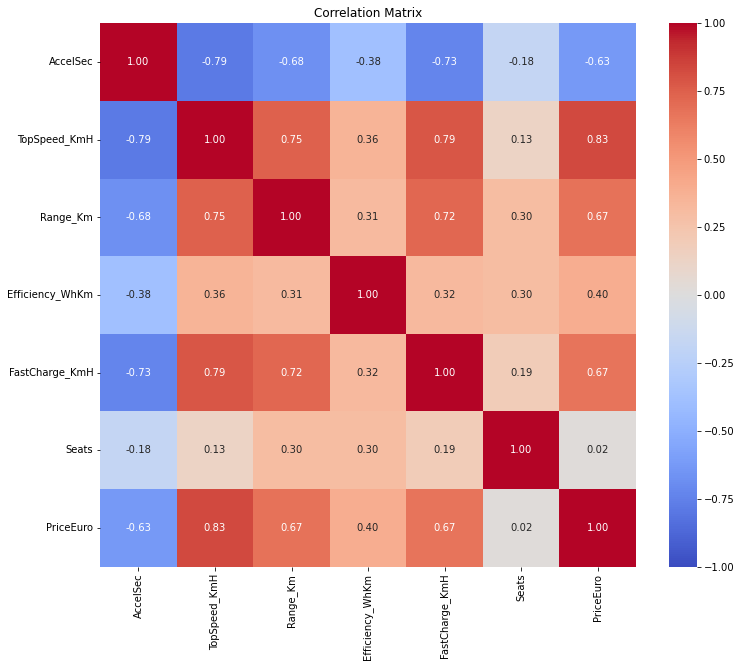

In [7]:
import seaborn as sns
target_variable = 'y'
correlation_matrix = dataset.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


# Removes Features from a dataset with a low correlation to the target variable

In [8]:
target_variable = 'PriceEuro'
correlation_matrix = dataset.corr()
threshold = 0.2 
low_corr_features = correlation_matrix[abs(correlation_matrix[target_variable]) < threshold].index
# Remove low correlation features from the dataset
data_filtered = dataset.drop(low_corr_features, axis=1)
print("Removed Features:")
print(low_corr_features)

Removed Features:
Index(['Seats'], dtype='object')


# Removes the column "Seats" from the dataset 

In [9]:
x = dataset.drop("Seats", axis=1)
print(x)


           Brand                            Model  AccelSec  TopSpeed_KmH  \
0         Tesla     Model 3 Long Range Dual Motor       4.6           233   
1    Volkswagen                         ID.3 Pure      10.0           160   
2      Polestar                                 2       4.7           210   
3           BMW                              iX3        6.8           180   
4         Honda                                e        9.5           145   
..           ...                              ...       ...           ...   
98       Nissan                       Ariya 63kWh       7.5           160   
99         Audi     e-tron S Sportback 55 quattro       4.5           210   
100      Nissan               Ariya e-4ORCE 63kWh       5.9           200   
101      Nissan   Ariya e-4ORCE 87kWh Performance       5.1           200   
102       Byton                 M-Byte 95 kWh 2WD       7.5           190   

     Range_Km  Efficiency_WhKm  FastCharge_KmH RapidCharge PowerTrain  \
0 

Print all Columns

In [10]:
x.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'PriceEuro'],
      dtype='object')

Checking whether there is any null value or not

In [11]:
x.isnull().sum()


Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
PriceEuro          0
dtype: int64

# Performs one-hot encoding on the categorical columns specified in the list 

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# Select the categorical columns to one-hot encode
categorical_columns = [ 'BodyStyle', 'PowerTrain', 'PlugType', 'Segment','RapidCharge']

# Perform one-hot encoding
x = pd.get_dummies(x, columns=categorical_columns)

print(x)

           Brand                            Model  AccelSec  TopSpeed_KmH  \
0         Tesla     Model 3 Long Range Dual Motor       4.6           233   
1    Volkswagen                         ID.3 Pure      10.0           160   
2      Polestar                                 2       4.7           210   
3           BMW                              iX3        6.8           180   
4         Honda                                e        9.5           145   
..           ...                              ...       ...           ...   
98       Nissan                       Ariya 63kWh       7.5           160   
99         Audi     e-tron S Sportback 55 quattro       4.5           210   
100      Nissan               Ariya e-4ORCE 63kWh       5.9           200   
101      Nissan   Ariya e-4ORCE 87kWh Performance       5.1           200   
102       Byton                 M-Byte 95 kWh 2WD       7.5           190   

     Range_Km  Efficiency_WhKm  FastCharge_KmH  PriceEuro  BodyStyle_Cabrio

# Converts 'Brand' and 'Model' columns to categorical data type then encodes them as numerical codes

In [13]:
x['Brand'] = x['Brand'].astype('category')
x['Model'] = x['Model'].astype('category')
x['Brand'] = x['Brand'].cat.codes
x['Model'] = x['Model'].cat.codes

In [14]:
print(x)

     Brand  Model  AccelSec  TopSpeed_KmH  Range_Km  Efficiency_WhKm  \
0       30     46       4.6           233       450              161   
1       31     33      10.0           160       270              167   
2       23      0       4.7           210       400              181   
3        2    101       6.8           180       360              206   
4        9     78       9.5           145       170              168   
..     ...    ...       ...           ...       ...              ...   
98      20      6       7.5           160       330              191   
99       1     94       4.5           210       335              258   
100     20      8       5.9           200       325              194   
101     20     10       5.1           200       375              232   
102      3     42       7.5           190       400              238   

     FastCharge_KmH  PriceEuro  BodyStyle_Cabrio  BodyStyle_Hatchback  ...  \
0               940      55480                 0         

# Generates KDE plots for numerical columns and count plots for categorical columns

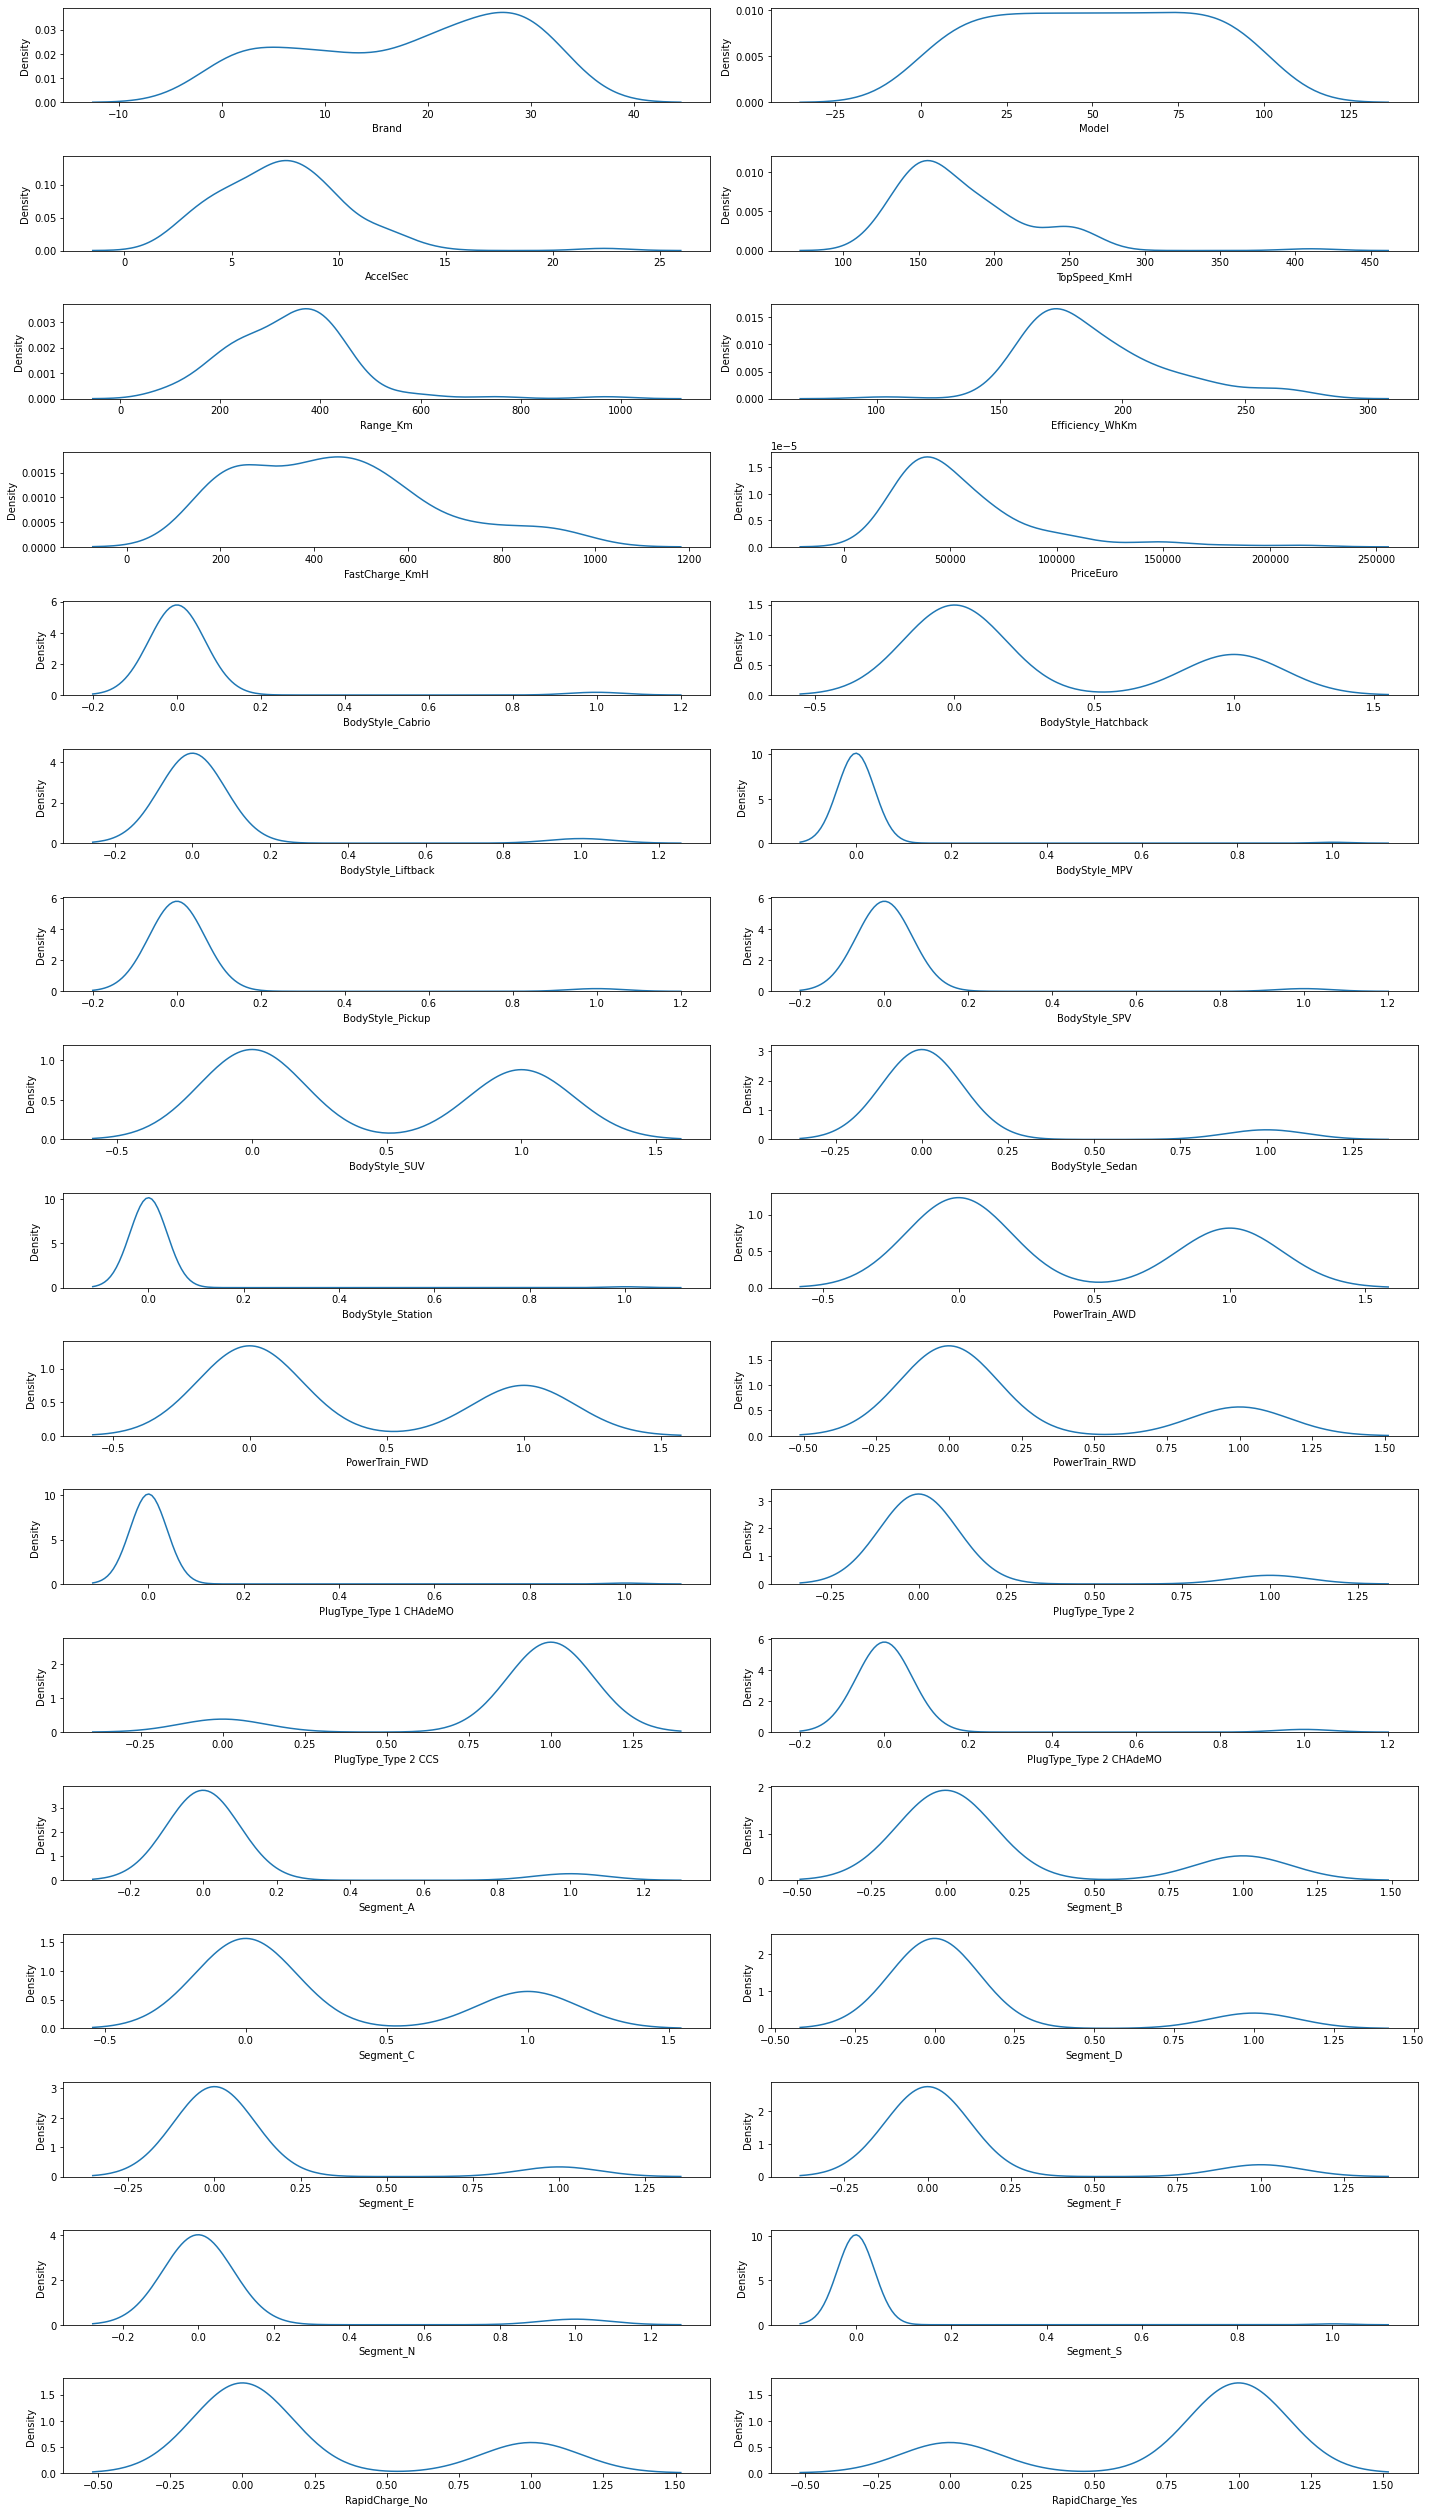

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 35))
num_plots = len(x.columns)
num_numerical_plots = sum(x[col].dtype != 'object' for col in x.columns)

for i, col in enumerate(x.columns):
    ax = plt.subplot((num_plots // 2) + (num_plots % 2), 2, i+1)
    if x[col].dtype != 'object':
        sns.kdeplot(x[col], ax=ax)
    else:
        sns.countplot(x[col], ax=ax)
    plt.xlabel(col)

plt.tight_layout()
plt.show()



# Generates a bar plot showing the frequency distribution of the 'Brand' column

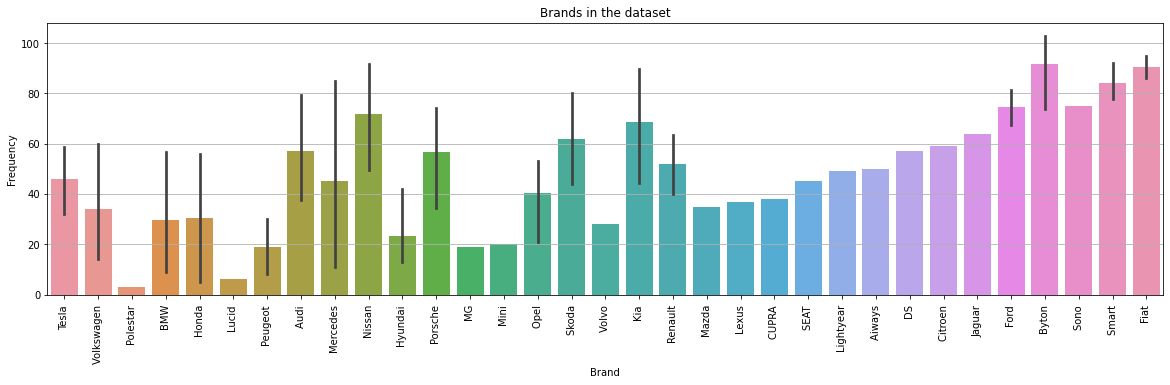

In [16]:
import seaborn as sb
import matplotlib.pyplot as plt
a  = np.arange(1, 104)
plt.figure(figsize=(20, 5))
ax = sb.barplot(x='Brand', y=a, data=dataset)
plt.grid(axis='y')
plt.title('Brands in the dataset')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  
plt.show()



# Creates a bar plot to display the frequency distribution of the 'Model' column

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101]),
 [Text(0, 0, 'Model 3 Long Range Dual Motor'),
  Text(1, 0, 'ID.3 Pure'),
  Text(2, 0, '2'),
  Text(3, 0, 'iX3 '),
  Text(4, 0, 'e '),
  Text(5, 0, 'Air '),
  Text(6, 0, 'e-Golf '),
  Text(7, 0, 'e-208 '),
  Text(8, 0, 'Model 3 Standard Range Plus'),
  Text(9, 0, 'Q4 e-tron '),
  Text(10, 0, 'EQC 400 4MATIC'),
  Text(11, 0, 'Leaf '),
  Text(12, 0, 'Kona Electric 64 kWh'),
  Text(13, 0, 'i4 '),
  Text(14, 0, 'IONIQ Electr

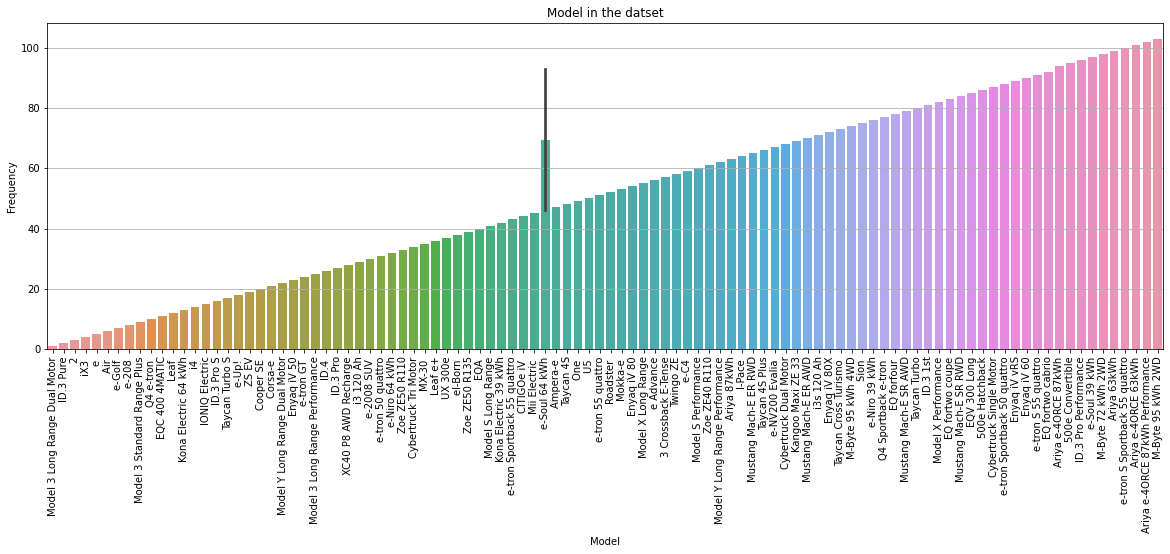

In [17]:
ax= plt.figure(figsize=(20,6))
a  = np.arange(1, 104)
sb.barplot(x='Model',y=a,data=dataset)
plt.grid(axis='y')
plt.title('Model in the datset')
plt.xlabel('Model')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

# Group the data by 'Model' and calculate the maximum 'TopSpeed_KmH' for each model

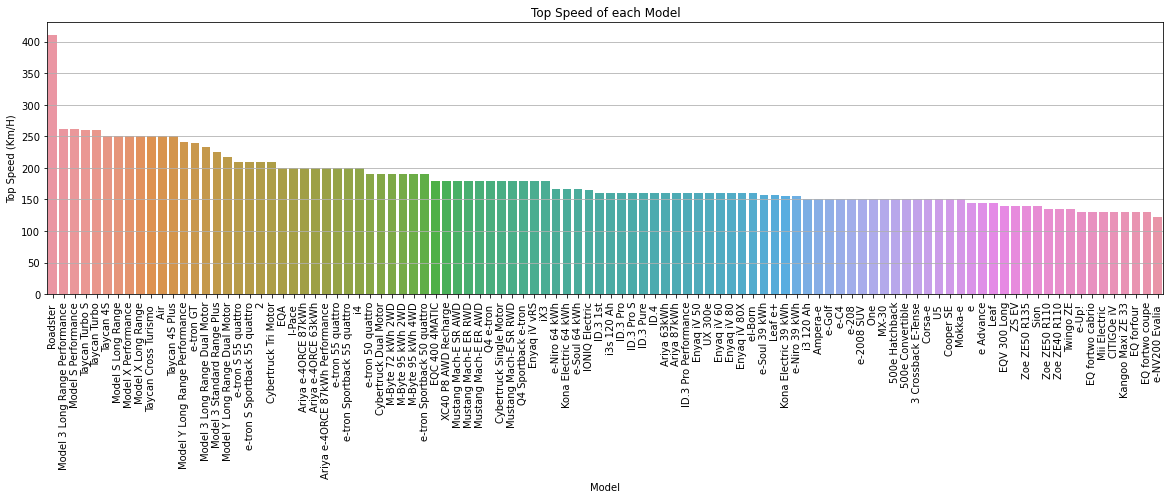

In [18]:
# Group the data by 'Model' and calculate the maximum 'TopSpeed_KmH' for each model
top_speeds = dataset.groupby('Model')['TopSpeed_KmH'].max()

# Sort the top speeds in descending order
top_speeds_sorted = top_speeds.sort_values(ascending=False)

# Plot the top speeds
plt.figure(figsize=(20, 5))
ax = sb.barplot(x=top_speeds_sorted.index, y=top_speeds_sorted.values)
plt.grid(axis='y')
plt.title('Top Speed of each Model')
plt.xlabel('Model')
plt.ylabel('Top Speed (Km/H)')
plt.xticks(rotation=90)
plt.show()


# Top speeds achieved by the cars of a brand

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

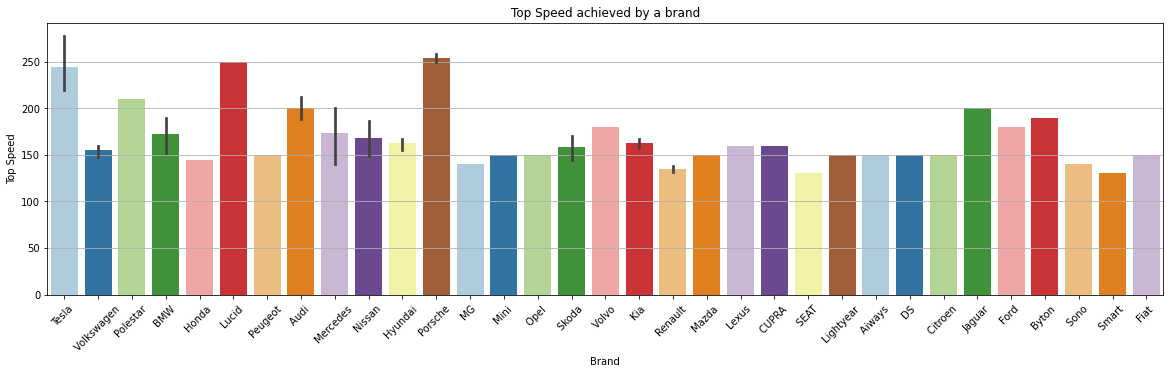

In [19]:
ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y='TopSpeed_KmH',data=dataset,palette='Paired')
plt.grid(axis='y')
plt.title('Top Speed achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Top Speed')
plt.xticks(rotation=45)

# calculates the correlation matrix

In [20]:
x.corr()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,PriceEuro,BodyStyle_Cabrio,BodyStyle_Hatchback,...,Segment_A,Segment_B,Segment_C,Segment_D,Segment_E,Segment_F,Segment_N,Segment_S,RapidCharge_No,RapidCharge_Yes
Brand,1.000000,-0.401572,0.062730,0.101759,0.088316,-0.195901,0.141816,-0.036023,0.059550,0.224153,...,0.244761,-0.185717,0.208188,-0.109814,-0.482973,0.153684,0.176347,0.112661,-0.022390,0.022390
Model,-0.401572,1.000000,-0.050635,0.067814,-0.066035,0.010976,0.008423,0.169003,-0.136062,-0.119107,...,-0.113714,0.101872,-0.203283,0.055961,0.226929,0.084678,-0.165896,0.040692,0.088955,-0.088955
AccelSec,0.062730,-0.050635,1.000000,-0.786195,-0.677062,-0.382904,-0.733559,-0.627174,0.015606,0.329247,...,0.430719,0.219202,0.089784,-0.272622,-0.160106,-0.415748,0.234998,-0.174638,0.292518,-0.292518
TopSpeed_KmH,0.101759,0.067814,-0.786195,1.000000,0.746662,0.355675,0.785218,0.829057,0.202943,-0.420071,...,-0.301909,-0.343784,-0.220692,0.215241,0.134655,0.537846,-0.097666,0.527045,-0.220113,0.220113
Range_Km,0.088316,-0.066035,-0.677062,0.746662,1.000000,0.313077,0.723714,0.674844,0.137495,-0.375782,...,-0.420363,-0.303817,-0.048325,0.201535,0.017555,0.336531,0.081739,0.498396,-0.251910,0.251910
Efficiency_WhKm,-0.195901,0.010976,-0.382904,0.355675,0.313077,1.000000,0.321925,0.396705,-0.034330,-0.375969,...,-0.187688,-0.362006,-0.179351,-0.035057,0.543141,0.058644,0.445197,0.056653,-0.013894,0.013894
FastCharge_KmH,0.141816,0.008423,-0.733559,0.785218,0.723714,0.321925,1.000000,0.667873,0.033335,-0.390395,...,-0.342106,-0.387973,-0.136679,0.353404,0.069035,0.408353,0.035613,0.232089,-0.225863,0.225863
PriceEuro,-0.036023,0.169003,-0.627174,0.829057,0.674844,0.396705,0.667873,1.000000,0.187014,-0.413426,...,-0.263268,-0.322378,-0.275769,0.032529,0.178181,0.682892,-0.021956,0.464017,-0.199737,0.199737
BodyStyle_Cabrio,0.059550,-0.136062,0.015606,0.202943,0.137495,-0.034330,0.033335,0.187014,1.000000,-0.116280,...,0.182629,0.050604,-0.111035,-0.071510,-0.056796,-0.062897,-0.043077,0.571662,0.032259,-0.032259
BodyStyle_Hatchback,0.224153,-0.119107,0.329247,-0.420071,-0.375782,-0.375969,-0.390395,-0.413426,-0.116280,1.000000,...,0.318865,0.213206,0.262259,-0.277172,-0.220143,-0.243790,-0.166969,-0.066473,0.092839,-0.092839


# Generates a heatmap visualization of the correlation matrix

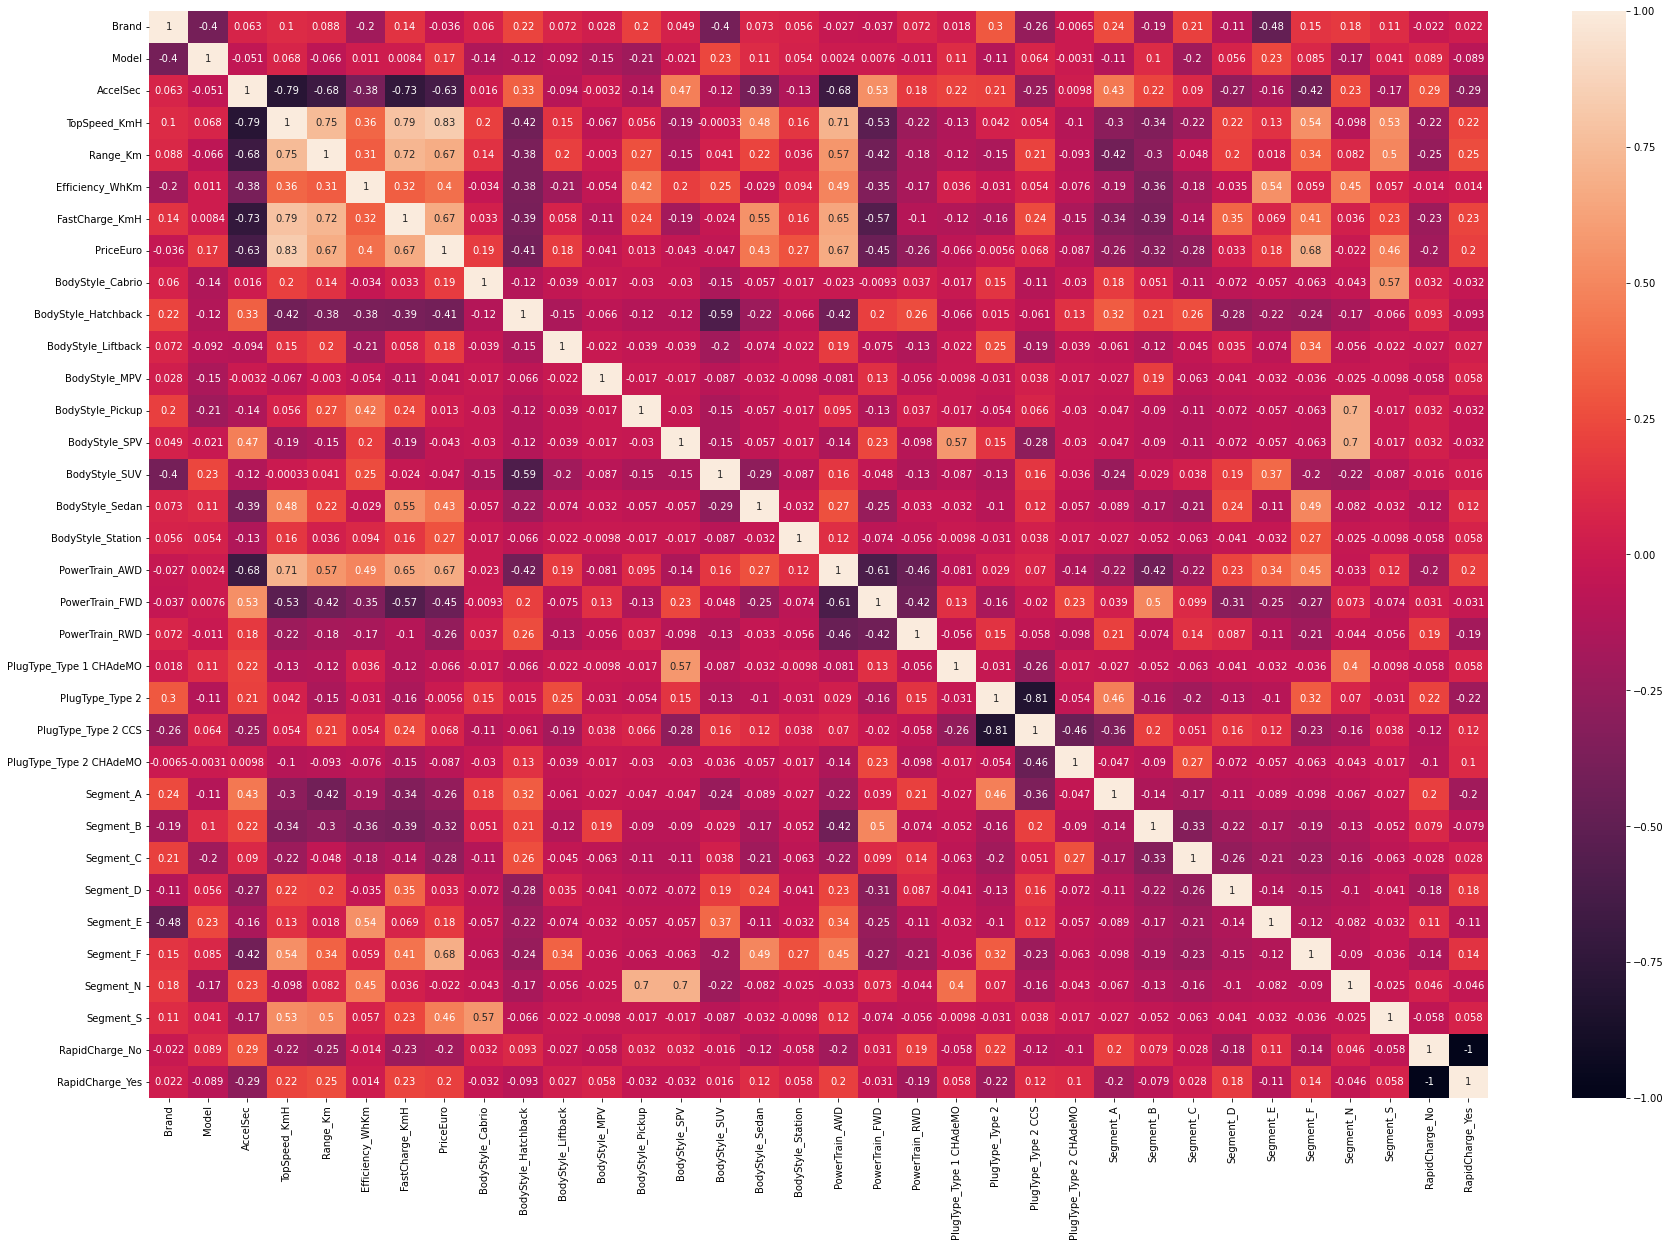

In [21]:
plt.figure(figsize=(30,20))
sns.heatmap(x.corr(), annot=True)
plt.show()

# Creates a subplot grid to visualize histograms for the variables specified

Each histogram represents the distribution of values for a particular variable, with 25 bins and a kernel density estimate (KDE) overlaid for smoother visualization. Seaborn's histplot function is utilized for improved aesthetics.

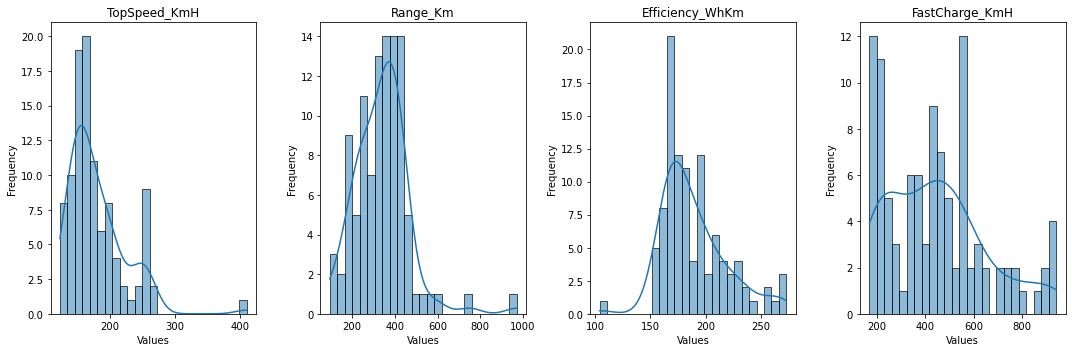

In [22]:
columns = ['TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'FastCharge_KmH']

plt.figure(figsize=(15, 5))
num_cols = len(columns)

# Plot histograms for each variable
for i, col in enumerate(columns, start=1):
    plt.subplot(1, num_cols, i)
    sns.histplot(x[col], bins=25, kde=True)  
    plt.title(col)
    plt.xlabel('Values')
    plt.ylabel('Frequency')

plt.tight_layout() 
plt.show()

# Select Specified Columns and convert them into numpy array

In [23]:
X = x.iloc[ : ,[3,4,5,6]].values
print(X)

[[233 450 161 940]
 [160 270 167 250]
 [210 400 181 620]
 [180 360 206 560]
 [145 170 168 190]
 [250 610 180 620]
 [150 190 168 220]
 [150 275 164 420]
 [225 310 153 650]
 [180 400 193 540]
 [180 370 216 440]
 [144 220 164 230]
 [167 400 160 380]
 [200 450 178 650]
 [165 250 153 210]
 [160 440 175 590]
 [260 375 223 780]
 [130 195 166 170]
 [140 220 193 260]
 [150 185 156 260]
 [150 275 164 420]
 [217 425 171 930]
 [160 290 179 230]
 [240 425 197 850]
 [261 435 167 910]
 [160 420 183 560]
 [160 350 166 490]
 [180 375 200 470]
 [150 235 161 270]
 [150 250 180 380]
 [190 280 231 450]
 [167 370 173 350]
 [135 315 165 230]
 [210 750 267 710]
 [150 180 178 240]
 [157 325 172 390]
 [160 270 193 190]
 [160 425 181 570]
 [140 310 168 230]
 [200 350 171 440]
 [250 515 184 560]
 [155 255 154 210]
 [200 380 228 610]
 [130 195 166 170]
 [130 195 166 170]
 [167 365 175 340]
 [150 335 173 210]
 [250 365 195 730]
 [150 575 104 540]
 [150 335 188 350]
 [200 365 237 590]
 [410 970 206 920]
 [150 255 17

# Performs KMeans clustering ,plots an elbow curve to determine the optimal number of clusters

C:\Users\mites\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


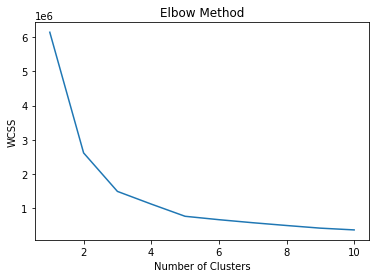

In [24]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


#  Fitting K-Means to the dataset

In [25]:
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

# Visualizes the clusters formed by applying KMeans clustering algorithm

This code segment visualizes the clusters formed by applying KMeans clustering algorithm to the feature matrix 'X'
with 5 clusters, displaying scatter plots for each pair of selected features: 'TopSpeed_KmH' vs 'Range_Km', 
'TopSpeed_KmH' vs 'Efficiency_WhKm', 'TopSpeed_KmH' vs 'FastCharge_KmH', and 'Range_Km' vs 'Efficiency_WhKm'.








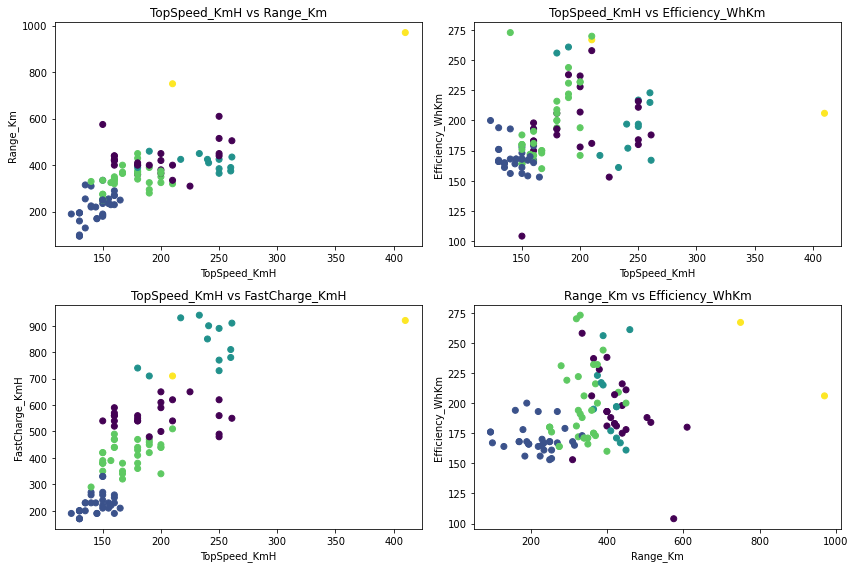

In [26]:
num_clusters = 5
cluster_labels = kmeans.labels_

plt.figure(figsize=(12, 8))

# Plot 1: TopSpeed_KmH vs Range_Km
plt.subplot(2, 2, 1)

plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('TopSpeed_KmH')
plt.ylabel('Range_Km')
plt.title('TopSpeed_KmH vs Range_Km')

# Plot 2: TopSpeed_KmH vs Efficiency_WhKm
plt.subplot(2, 2, 2)
plt.scatter(X[:, 0], X[:, 2], c=cluster_labels, cmap='viridis')
plt.xlabel('TopSpeed_KmH')
plt.ylabel('Efficiency_WhKm')
plt.title('TopSpeed_KmH vs Efficiency_WhKm')

# Plot 3: TopSpeed_KmH vs FastCharge_KmH
plt.subplot(2, 2, 3)
plt.scatter(X[:, 0], X[:, 3], c=cluster_labels, cmap='viridis')
plt.xlabel('TopSpeed_KmH')
plt.ylabel('FastCharge_KmH')
plt.title('TopSpeed_KmH vs FastCharge_KmH')

# Plot 4: Range_Km vs Efficiency_WhKm
plt.subplot(2, 2, 4)
plt.scatter(X[:, 1], X[:, 2], c=cluster_labels, cmap='viridis')
plt.xlabel('Range_Km')
plt.ylabel('Efficiency_WhKm')
plt.title('Range_Km vs Efficiency_WhKm')

plt.tight_layout()
plt.show()





# Visualizes each cluster separately by plotting the data points belonging to each cluster

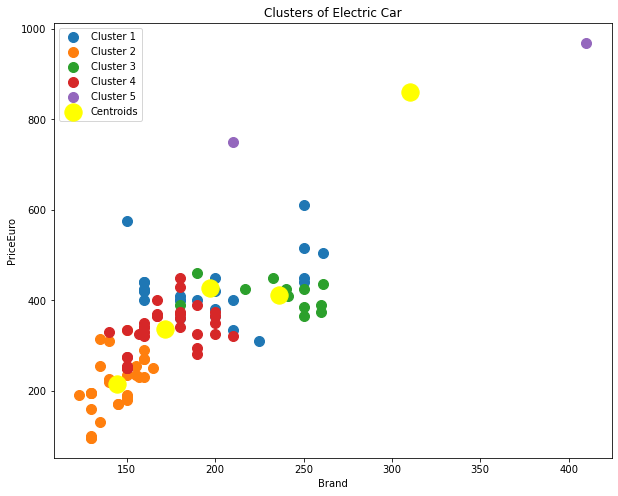

In [27]:
# Visualize each cluster separately
plt.figure(figsize=(10, 8))

for i in range(num_clusters):
    plt.scatter(X[cluster_labels == i, 0], X[cluster_labels == i, 1], s=100, label=f'Cluster {i+1}')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Electric Car')
plt.xlabel('Brand')
plt.ylabel('PriceEuro')
plt.legend()
plt.show()


# The best brand based on the selected criteria 

In [28]:
# Select only numeric columns from the dataset
numeric_columns = dataset.select_dtypes(include=[np.number]).columns

# Calculate the mean values of each feature within each cluster
cluster_means = pd.DataFrame(columns=numeric_columns)
for i in range(num_clusters):
    cluster_data = dataset.loc[cluster_labels == i, numeric_columns]  
    cluster_means.loc[f'Cluster {i+1}'] = cluster_data.mean()

best_cluster = cluster_means[['TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'FastCharge_KmH']].idxmax()  

# Identify the brand(s) associated with the data points in the selected cluster
best_brands = dataset.loc[cluster_labels == int(best_cluster[-1][-1]), 'Brand'].unique()

print(f"The best brand(s) based on the selected criteria (e.g., highest 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', FastCharge_KmH') is: {best_brands}")


The best brand(s) based on the selected criteria (e.g., highest 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', FastCharge_KmH') is: ['Peugeot ' 'Mercedes ' 'Hyundai ' 'Opel ' 'Volkswagen ' 'Volvo ' 'Audi '
 'Kia ' 'Nissan ' 'Aiways ' 'DS ' 'Citroen ' 'Jaguar ' 'Ford ' 'Byton '
 'Skoda ']
